# Exploring the data

### Indíce
1. [Introdução](#introducao)
2. [Importando as dependências](#importando-as-dependências)
3. [Importando os datasets](#importando-os-datasets)
4. [Ativos e demitidos](#ativos-e-demitidos)
5. [Movimentações](#movimentações)
6. [Certificações](#certificações)
7. [Entrevistas](#entrevistas)

### Introdução

Estamos lidando com 4 datasets diferentes:

- **SRA Ativo e Demitidos**: Tabela com a lista de funcionários ativos e desligados
- **Movimentações**: listando as promoções das pessoas ao longo do período
- **Certificações**: tabela com a adição de novas certificações ao perfil dos funcionários conforme vão as adquirindo
- **Entrevistas**: tabela com dados das entrevistas demessionais conduzidas com funcionários que pedem para ser desligados da companhia

Abaixo iremos explorar melhor o que compõe cada dataset.

### Importando as dependências

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando os datasets

In [2]:
sra = pd.read_excel("../data/SRA Ativo e Demitidos envio.xlsx")
movimentacoes = pd.read_excel("../data/Movimentações.xlsx")
certificacoes = pd.read_excel("../data/Certificacoes.xlsx")
entrevistas = pd.read_excel("../data/Entrevistas.xlsx")

### Ativos e Demitidos

Qual o aspecto geral do `DataFrame`?

In [20]:
sra.head()

,FILIAL,DESC.FIL,MATRICULA,CENTRO DE CUSTO,FUNCAO,ADMISSAO,DEMISSAO,IDADE,SEXO,EST.CIVIL,...,SIT. FOLHA,SALARIO,ESTADO,DIRETOR,HOME,TIPO DEMISSÃO,TIPO_RES,DESCR_RECISAO,COD_TO,MOTIVO TO
0,5,CANDELARIA II,168186,1001230253,921,2011-11-07,2022-01-07 00:00:00,53,M,SOLTEIRO(A),...,D,4237.57,RJ,CLOUD PORTIFOLIO,FULL,PROVOCADO,3.0,DISPENSA SEM JUSTA CAUSA (API),NaN,NaN
1,5,CANDELARIA II,236946,1061532281,201,2014-02-05,2022-01-07 00:00:00,38,M,SOLTEIRO(A),...,D,5598.72,RJ,CLOUD PORTIFOLIO,FULL,VOLUNTARIO,5.0,PEDIDO DE DEMISSAO,NaN,NaN
2,5,CANDELARIA II,265449,1001230220,604,2011-05-02,2022-01-03 00:00:00,35,M,CASADO(A),...,D,15623.47,RJ,CLIENTE E SALES,FULL,VOLUNTARIO,5.0,PEDIDO DE DEMISSAO,NaN,NaN
3,5,CANDELARIA II,280823,1001230129,111,2015-09-08,2022-01-06 00:00:00,33,F,SOLTEIRO(A),...,D,1407.25,RJ,CLOUD PORTIFOLIO,FULL,PROVOCADO,3.0,DISPENSA SEM JUSTA CAUSA (API),NaN,NaN
4,5,CANDELARIA II,294487,1001230259,919,2016-10-03,2022-01-04 00:00:00,35,M,CASADO(A),...,D,1679.49,RJ,CLOUD PORTIFOLIO,FULL,VOLUNTARIO,6.0,PEDIDO DE DEMISSAO C/ DESC AVP,NaN,NaN


**Existem dados nulos? Quantos são?**

Sim, nas colunas `SIT. FOLHA`, `TIPO DEMISSÃO`, `TIPO_RES`, `DESCR_RECISAO`, `COD_TO` e `MOTIVO TO`.

In [48]:
sra = sra.replace("-", np.nan)
sra = sra.replace("/  /", np.nan)
sra.isnull().sum()

FILIAL                0
DESC.FIL              0
MATRICULA             0
CENTRO DE CUSTO       0
FUNCAO                0
ADMISSAO              0
DEMISSAO           4046
IDADE                 0
SEXO                  0
EST.CIVIL             0
RACA/COR              0
SIT. FOLHA         3244
SALARIO               0
ESTADO                0
DIRETOR               0
HOME                  0
TIPO DEMISSÃO      4046
TIPO_RES           4046
DESCR_RECISAO      4046
COD_TO             6019
MOTIVO TO          6019
dtype: int64

**Quais as colunas, tipos e outras informações básicas?**

Temos 6020 entradas no total

In [27]:
sra.describe()

,FILIAL,CENTRO DE CUSTO,IDADE,SALARIO,TIPO_RES,COD_TO
count,6020.000000,6.020000e+03,6020.000000,6020.00000,1974.000000,1.0
mean,24.306478,1.075587e+09,37.043023,6980.29838,7.621074,28.0
std,19.097156,3.586009e+08,10.239318,6503.90272,9.297869,NaN
min,1.000000,1.001101e+09,15.000000,569.36000,1.000000,28.0
25%,9.000000,1.001225e+09,29.000000,2289.01750,3.000000,28.0
50%,19.000000,1.001230e+09,36.000000,4434.31500,5.000000,28.0
75%,27.000000,1.001231e+09,43.000000,10000.00000,6.000000,28.0
max,71.000000,3.007010e+09,74.000000,93186.15000,42.000000,28.0


In [4]:
print(f"O DataFrame tem {len(sra.columns)} colunas.\n")

for column in sra.columns:
    print(
        f"A coluna {column} tem o tipo {'string' if sra[column].dtype == 'object' else sra[column].dtype}.")

O DataFrame tem 21 colunas.

A coluna FILIAL tem o tipo int64.
A coluna DESC.FIL tem o tipo string.
A coluna MATRICULA tem o tipo string.
A coluna CENTRO DE CUSTO tem o tipo int64.
A coluna FUNCAO tem o tipo string.
A coluna ADMISSAO tem o tipo datetime64[ns].
A coluna DEMISSAO tem o tipo string.
A coluna IDADE tem o tipo int64.
A coluna SEXO tem o tipo string.
A coluna EST.CIVIL tem o tipo string.
A coluna RACA/COR tem o tipo string.
A coluna SIT. FOLHA tem o tipo string.
A coluna SALARIO tem o tipo float64.
A coluna ESTADO tem o tipo string.
A coluna DIRETOR tem o tipo string.
A coluna HOME tem o tipo string.
A coluna TIPO DEMISSÃO tem o tipo string.
A coluna TIPO_RES tem o tipo float64.
A coluna DESCR_RECISAO tem o tipo string.
A coluna COD_TO tem o tipo float64.
A coluna MOTIVO TO tem o tipo string.


#### Colunas principais

|Coluna|Descrição|
|---|---|
|IDADE|Idade em que a pessoa foi desligada|
|SEXO|Dado categórico, dividido em Masculino e Feminino|
|DATA DE ADMISSÃO|Data em que a pessoa foi contratada|
|DATA DE DEMISSÃO|Data em que foi desligada (voluntariamente ou não), o que nos permite calcular (junto da coluna acima) o tempo de permanência da pessoa na empresa|
|SALÁRIO|Valor bruto, em Reais, recebido pela pessoa|
|ESTADO|Estado brasileiro (note que só temos dados do Brasil) de residência da pessoa|
|TIPO DE DEMISSÃO|Se forçada (PROVOCADO) ou voluntária (VOLUNTARIA) ou se a pessoa estava em período de experiência (EXPERIENCIA)|

#### IDADE

<Axes: xlabel='IDADE', ylabel='Count'>

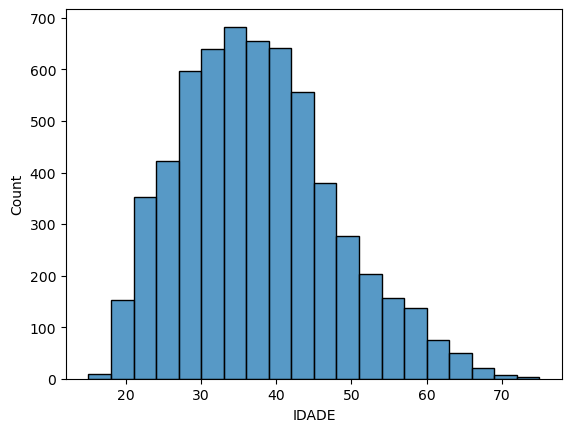

In [5]:
sns.histplot(data=sra, x='IDADE', binwidth=3)

In [6]:
sra['IDADE'].quantile([.05, .1, .25, .5, .75, .95])

0.05    22.0
0.10    24.0
0.25    29.0
0.50    36.0
0.75    43.0
0.95    56.0
Name: IDADE, dtype: float64

In [7]:
sra['IDADE'].describe()

count    6020.000000
mean       37.043023
std        10.239318
min        15.000000
25%        29.000000
50%        36.000000
75%        43.000000
max        74.000000
Name: IDADE, dtype: float64

#### Coluna SEXO

Abaixo vemos a distribuição entre os sexos.

In [20]:
sra['SEXO'].value_counts()

M    4419
F    1601
Name: SEXO, dtype: int64

E abaixo o histograma

<Axes: xlabel='SEXO', ylabel='Count'>

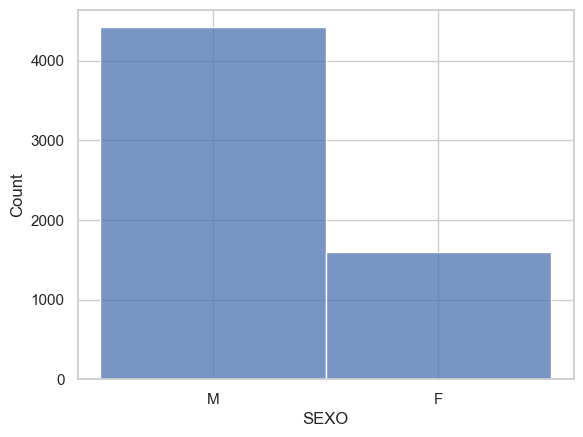

In [21]:
sns.set_theme(style='whitegrid')
sns.histplot(data=sra, x='SEXO')

#### Coluna DATA DE ADMISSÃO

Convertendo os dados para `datetime`

In [33]:
hire_date = pd.to_datetime(sra['ADMISSAO'])

Abaixo vemos a distribuição dos dados

<Axes: xlabel='ADMISSAO', ylabel='Count'>

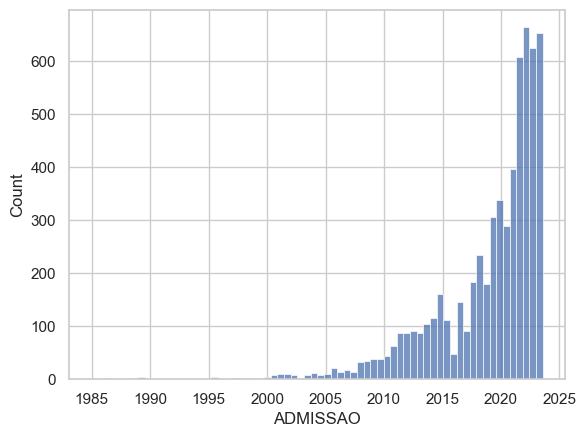

In [34]:
sns.histplot(data=hire_date)

Descrevendo os dados um pouco mais de perto 👇

In [35]:
hire_date.describe()

/var/folders/dm/yn213p851td579hjmn729b0m0000gn/T/ipykernel_9195/293986355.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hire_date.describe()


count                    6020
unique                   1788
top       2023-07-03 00:00:00
freq                       59
first     1985-01-02 00:00:00
last      2023-07-27 00:00:00
Name: ADMISSAO, dtype: object

Quantas pessoas foram contratadas antes do ano 2000?

In [40]:
hire_date[hire_date < '2000'].value_counts().sum()

24

E os percentis? Como os dados estão distribuídos?

In [43]:
hire_date.quantile([.1, .25, .5, .75, .95]).dt.date

0.10    2012-04-30
0.25    2017-01-29
0.50    2020-08-19
0.75    2022-04-05
0.95    2023-05-15
Name: ADMISSAO, dtype: object

Coluna DATA DE DEMISSAO

Convertendo para `datetime`

In [49]:
fire_date = pd.to_datetime(sra['DEMISSAO'])

**Quando a data de demissão é nula, as outras colunas de interesse também são?** Não, apenas o tipo de demissão é nulo quando a data de demissão o é. Ou seja, provavelmente faz sentido manter as linhas em que a data de demissão é nula.

In [60]:
sra['ADMISSAO'][fire_date.isnull()].isnull().sum()

0

In [59]:
sra['SALARIO'][fire_date.isnull()].isnull().sum()

0

In [61]:
sra['TIPO DEMISSÃO'][fire_date.isnull()].isnull().sum()

4046

Qual a demissão mais antiga e a mais recente?

In [53]:
fire_date.value_counts().sort_index()

2022-01-03    38
2022-01-04    13
2022-01-05     9
2022-01-06     3
2022-01-07    15
              ..
2023-07-19     1
2023-07-26     2
2023-07-27     1
2023-07-28     2
2023-07-31     3
Name: DEMISSAO, Length: 392, dtype: int64

Qual a distribuição das datas? Qual a média por mês?

In [74]:
fire_date_month = fire_date.dropna().apply(lambda date: date.strftime('%Y-%m'))

In [77]:
fire_date_month.value_counts().describe()

count     19.000000
mean     103.894737
std       21.042008
min       44.000000
25%       97.000000
50%      105.000000
75%      112.000000
max      148.000000
Name: DEMISSAO, dtype: float64

<Axes: xlabel='DEMISSAO', ylabel='Count'>

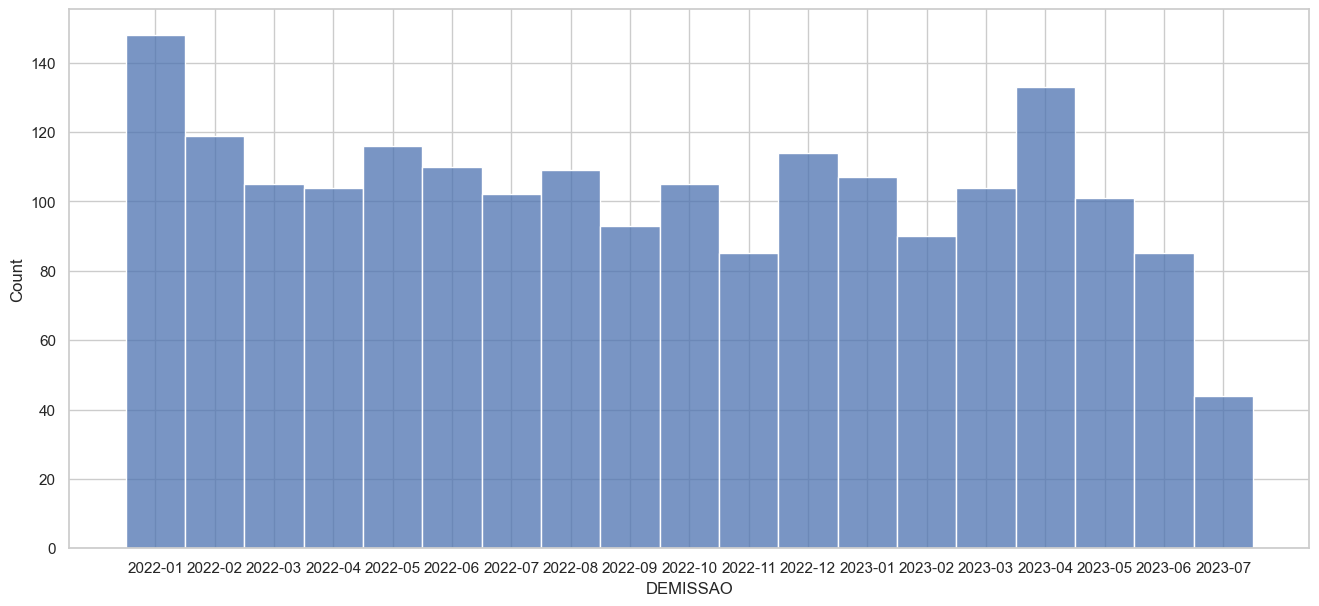

In [84]:
plt.figure(figsize=(16, 7))
sns.histplot(data=fire_date_month)

#### Coluna SALARIO

In [86]:
sra['SALARIO'].describe()

count     6020.00000
mean      6980.29838
std       6503.90272
min        569.36000
25%       2289.01750
50%       4434.31500
75%      10000.00000
max      93186.15000
Name: SALARIO, dtype: float64

<Axes: xlabel='SALARIO', ylabel='Count'>

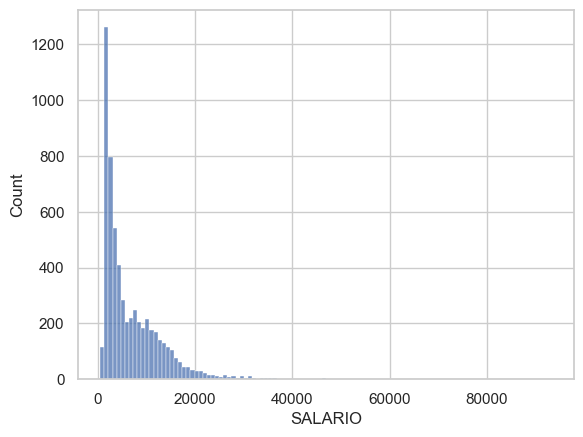

In [87]:
sns.histplot(data=sra, x='SALARIO')

In [91]:
less_than_30k = sra['SALARIO'][sra['SALARIO'] < 30_000]

<Axes: xlabel='SALARIO', ylabel='Count'>

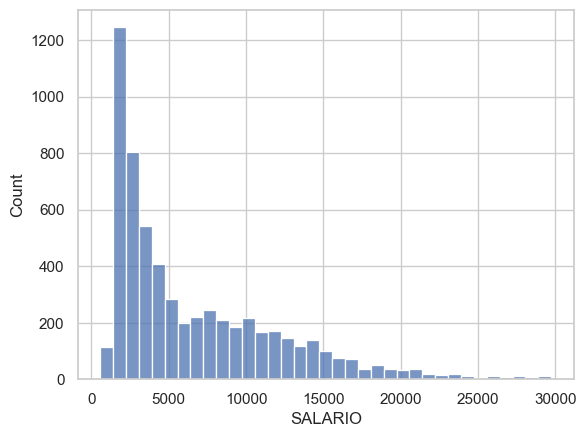

In [92]:
sns.histplot(data=less_than_30k)

In [93]:
sra['SALARIO'].quantile([.1, .25, .5, .75, .9, .99])

0.10     1938.7700
0.25     2289.0175
0.50     4434.3150
0.75    10000.0000
0.90    14876.1840
0.99    29705.7179
Name: SALARIO, dtype: float64

### Movimentações

Qual o aspecto geral do `DataFrame`?

In [5]:
movimentacoes.head()

,MATRICULA,DATA ALTERACAO,TIPO ALTERACAO,DESC_TP_ALTERACAO,FUNCAO ANTERIOR,SALARIO ANTERIOR,FUNCAO_ATUAL,SALARIO_ATUAL
0,189,2021-03-02,2,PROMOCAO,377,19269.01,1479,26172.40
1,835,2020-09-02,2,PROMOCAO,12,8046.47,466,10782.38
2,2472,2022-02-02,6,MERITO,874,13124.18,874,15214.86
3,2826,2021-01-01,2,PROMOCAO,726,35541.79,1458,52832.40
4,2826,2021-03-02,6,MERITO,357,35541.79,1458,52832.40


**Existem dados nulos? Quantos são?**

Neste dataset não.

In [6]:
movimentacoes = movimentacoes.replace("-", np.nan)
movimentacoes.isnull().sum()

MATRICULA            0
DATA ALTERACAO       0
TIPO ALTERACAO       0
DESC_TP_ALTERACAO    0
FUNCAO ANTERIOR      0
SALARIO ANTERIOR     0
FUNCAO_ATUAL         0
SALARIO_ATUAL        0
dtype: int64

**Quais as colunas, tipos e outras informações básicas?**

Temos 3035 entradas no total

In [7]:
movimentacoes.describe()

,TIPO ALTERACAO,SALARIO ANTERIOR,SALARIO_ATUAL
count,3035.000000,3035.000000,3035.000000
mean,72.951895,6232.094336,8738.910685
std,51.978702,6648.756714,8432.069138
min,2.000000,454.290000,1359.650000
25%,6.000000,2156.260000,3397.090000
50%,112.000000,4138.650000,6420.870000
75%,112.000000,8414.735000,11649.440000
max,113.000000,141924.710000,178416.140000


In [8]:
print(f"O DataFrame tem {len(movimentacoes.columns)} colunas.\n")

for column in movimentacoes.columns:
    print(
        f"A coluna {column} tem o tipo {'string' if movimentacoes[column].dtype == 'object' else movimentacoes[column].dtype}.")

O DataFrame tem 8 colunas.

A coluna MATRICULA tem o tipo string.
A coluna DATA ALTERACAO tem o tipo datetime64[ns].
A coluna TIPO ALTERACAO tem o tipo int64.
A coluna DESC_TP_ALTERACAO tem o tipo string.
A coluna FUNCAO ANTERIOR tem o tipo string.
A coluna SALARIO ANTERIOR tem o tipo float64.
A coluna FUNCAO_ATUAL tem o tipo string.
A coluna SALARIO_ATUAL tem o tipo float64.


### Certificações

Qual o aspecto geral do `DataFrame`?

In [9]:
certificacoes.head()

,MATRICULA,NOME CERTIFICAÇÃO,NOME INSTITUIÇAO,EMISSÃO,VALIDADE
0,296144,SIX SIGMA YELLOW BELT PROFESSIONAL,6 SIGMA STUDY,02/12/2019,-
1,307812,SIX SIGMA YELLOW BELT PROFESSIONAL,6 SIGMA STUDY,06/06/2020,-
2,290835,SIX SIGMA YELLOW BELT PROFESSIONAL,6 SIGMA STUDY,03/06/2020,-
3,306464,SIX SIGMA YELLOW BELT PROFESSIONAL,6 SIGMA STUDY,05/03/2019,-
4,309321,PROFESSIONAL OKR COACH CERTIFIED - POCC,AGILE INSTITUTE BRAZIL,14/11/2021,-


**Existem dados nulos? Quantos são?**

Sim, na coluna `VALIDADE` temos 1302 dados nulos. Provavelmente porque os certificados não espiram nesses casos.

In [10]:
certificacoes = certificacoes.replace("-", np.nan)
certificacoes.isnull().sum()

MATRICULA               0
NOME CERTIFICAÇÃO       0
NOME INSTITUIÇAO        0
EMISSÃO                 0
VALIDADE             1302
dtype: int64

**Quais as colunas, tipos e outras informações básicas?**

Temos 2572 entradas no total.

In [12]:
certificacoes.describe()

,MATRICULA,NOME CERTIFICAÇÃO,NOME INSTITUIÇAO,EMISSÃO,VALIDADE
count,2572,2572,2572,2572,1270
unique,708,579,97,1145,482
top,291157,ORACLE CLOUD INFRASTRUCTURE 2023 CERTIFIED FOU...,MICROSOFT,08/08/2023,08/08/2025
freq,27,305,621,45,35


In [13]:
print(f"O DataFrame tem {len(certificacoes.columns)} colunas.\n")

for column in certificacoes.columns:
    print(
        f"A coluna {column} tem o tipo {'string' if certificacoes[column].dtype == 'object' else certificacoes[column].dtype}.")

O DataFrame tem 5 colunas.

A coluna MATRICULA tem o tipo string.
A coluna NOME CERTIFICAÇÃO tem o tipo string.
A coluna NOME INSTITUIÇAO tem o tipo string.
A coluna EMISSÃO tem o tipo string.
A coluna VALIDADE tem o tipo string.


### Entrevistas

Qual o aspecto geral do `DataFrame`?

In [14]:
entrevistas.head()

,MATRÍCULA,MAPA \nTOP TALENT,DISCIPLINA,SALÁRIO ATUAL,PARA QUAL EMPRESA FOI?,CARREIRA,DESENVOLVIMENTO PROFISSIONAL,REMUNERAÇÃO,BENEFÍCIOS,CLIMA,CULTURA,BEM ESTAR,OUTROS
0,E12394,NÃO,NaN,2900.00,BANCO PAN,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
1,310791,NÃO,NaN,9500.00,GLOBAL WEB,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
2,308968,NÃO,BANCO DE DADOS,15887.19,SERASA,SIM,SIM,NÃO,SIM,NÃO,NÃO,NÃO,NÃO
3,308236,NÃO,UNIX,0.00,ZADARA,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
4,297837,NÃO,WINDOWS,8000.00,CIELO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,SIM,NÃO


**Existem dados nulos? Quantos são?**

Sim, nas colunas `DISCIPLINA` e `PARA QUAL EMPRESA FOI?`.

In [15]:
entrevistas = entrevistas.replace("-", np.nan)
entrevistas.isnull().sum()

MATRÍCULA                         0
MAPA \nTOP TALENT                 0
DISCIPLINA                      819
SALÁRIO ATUAL                     0
PARA QUAL EMPRESA FOI?          817
CARREIRA                          0
DESENVOLVIMENTO PROFISSIONAL      0
REMUNERAÇÃO                       0
BENEFÍCIOS                        0
CLIMA                             0
CULTURA                           0
BEM ESTAR                         0
OUTROS                            0
dtype: int64

**Quais as colunas, tipos e outras informações básicas?**

Temos 922 entradas no total

In [18]:
entrevistas.describe()

,SALÁRIO ATUAL
count,922.000000
mean,721.400751
std,2830.666124
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,26000.000000


In [19]:
print(f"O DataFrame tem {len(entrevistas.columns)} colunas.\n")

for column in entrevistas.columns:
    print(
        f"A coluna {column} tem o tipo {'string' if entrevistas[column].dtype == 'object' else entrevistas[column].dtype}.")

O DataFrame tem 13 colunas.

A coluna MATRÍCULA tem o tipo string.
A coluna MAPA 
TOP TALENT tem o tipo string.
A coluna DISCIPLINA tem o tipo string.
A coluna SALÁRIO ATUAL tem o tipo float64.
A coluna PARA QUAL EMPRESA FOI? tem o tipo string.
A coluna CARREIRA tem o tipo string.
A coluna DESENVOLVIMENTO PROFISSIONAL tem o tipo string.
A coluna REMUNERAÇÃO tem o tipo string.
A coluna BENEFÍCIOS tem o tipo string.
A coluna CLIMA tem o tipo string.
A coluna CULTURA tem o tipo string.
A coluna BEM ESTAR tem o tipo string.
A coluna OUTROS tem o tipo string.
